<a href="https://colab.research.google.com/github/Het0c/EP1_machineLearning1/blob/main/EDA_FundamentosML_LopezHector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

import kagglehub

# Descarga de sataset desde kagglehub
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path de los archivos:", path) # Confirmacion de ruta mostrandola

# Carga de archivo como Dataframe
df = pd.read_csv(path + "/marketing_campaign.csv", delimiter="\t")


Path de los archivos: /root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1


In [7]:
df.head()  # Display the first few rows to understand the data structure


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


TotalChildren
0    0.264890
1    0.102837
2    0.111639
3    0.037736
Name: Response, dtype: float64


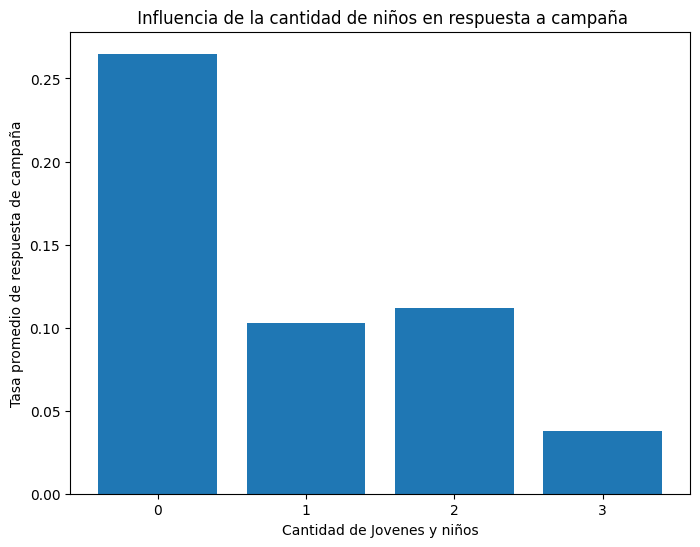

In [10]:
# Creacion columna que suma a niños y adolescentes en un mismo.
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# calculo de tasa promedio por cantidad de chiquitos
response_by_children = df.groupby('TotalChildren')['Response'].mean()
print(response_by_children)

plt.figure(figsize=(8, 6))
plt.bar(response_by_children.index, response_by_children.values)
plt.xlabel('Cantidad de Jovenes y niños')
plt.ylabel('Tasa promedio de respuesta de campaña')
plt.title(' Influencia de la cantidad de niños en respuesta a campaña')
plt.xticks(response_by_children.index)
plt.show()

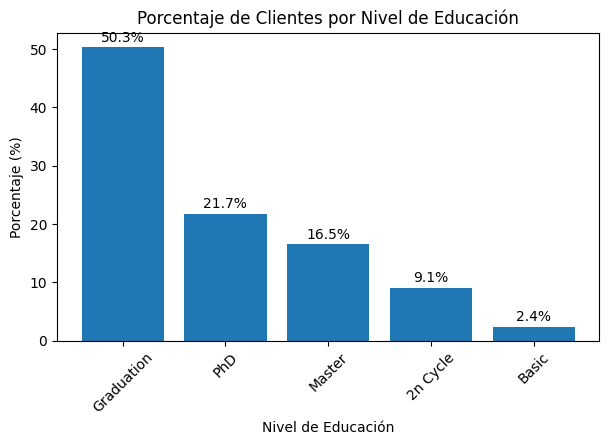

In [23]:
# calculo de porcentaje de cada nivel educativo
education_percentages = df['Education'].value_counts(normalize=True) * 100

# crear gráfico con porcentajes
plt.figure(figsize=(7, 4))
plt.bar(education_percentages.index, education_percentages.values)

# Etiquetas y formato del gráfico
plt.xlabel('Nivel de Educación')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Clientes por Nivel de Educación')
plt.xticks(rotation=45)

# Añadir etiquetas de porcentaje encima de las barras
for i, percentage in enumerate(education_percentages.values):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Muestra la cantidad de personas con sus distintos niveles de educacion en porcentajes, demostrando una amplia diferencia y destaque en la mayoria con la graduacion hecha

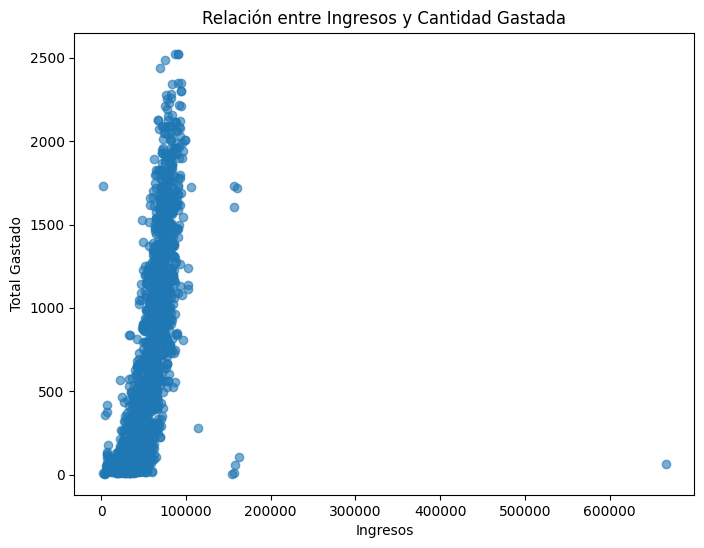

In [26]:
# suma de todos los productos en totalSpend
df['totalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['totalSpend'], alpha=0.6)  # Transparencia agregada para ver densidad
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.title('Relación entre Ingresos y Cantidad Gastada')

# Mostrar el gráfico
plt.show()

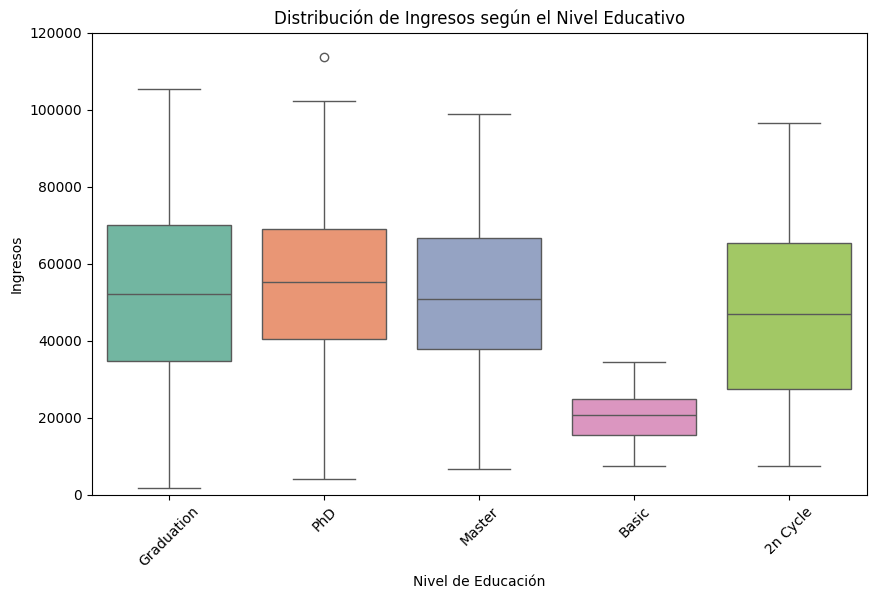

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df, hue='Education', dodge=False, palette='Set2')

plt.ylim(0, 120000) # ajuste de valor maximo

plt.xlabel('Nivel de Educación')
plt.ylabel('Ingresos')
plt.title('Distribución de Ingresos según el Nivel Educativo')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

mayor nivel educativo está asociado con mayores ingresos, pero también con una mayor dispersión en esos ingresos.

Algunos niveles, como tienen una mayor dispersión en los ingresos.
hay más variabilidad en los ingresos entre las personas de estos niveles educativos.

El nivel educativo "Basic" claramente tiene ingresos más bajos en comparación con los demás niveles, mostrando una diferencia notable.

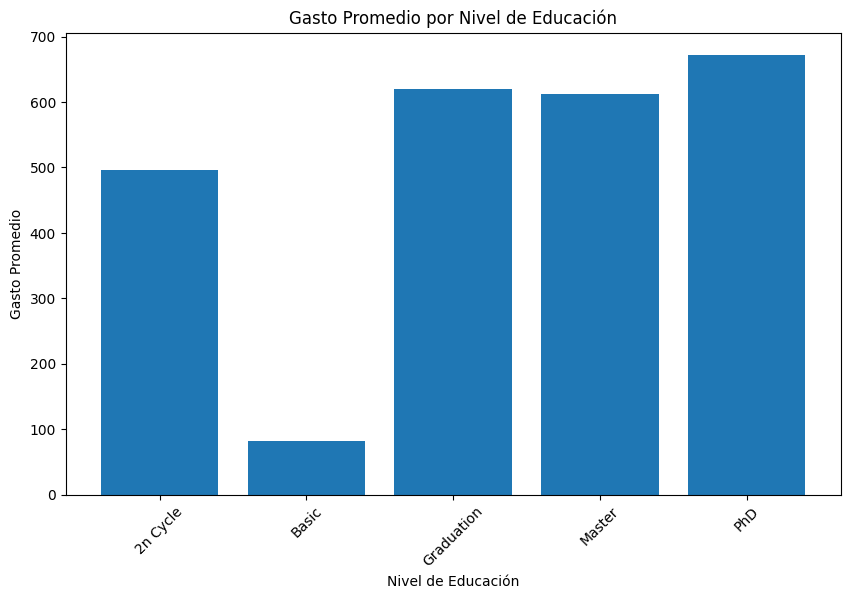

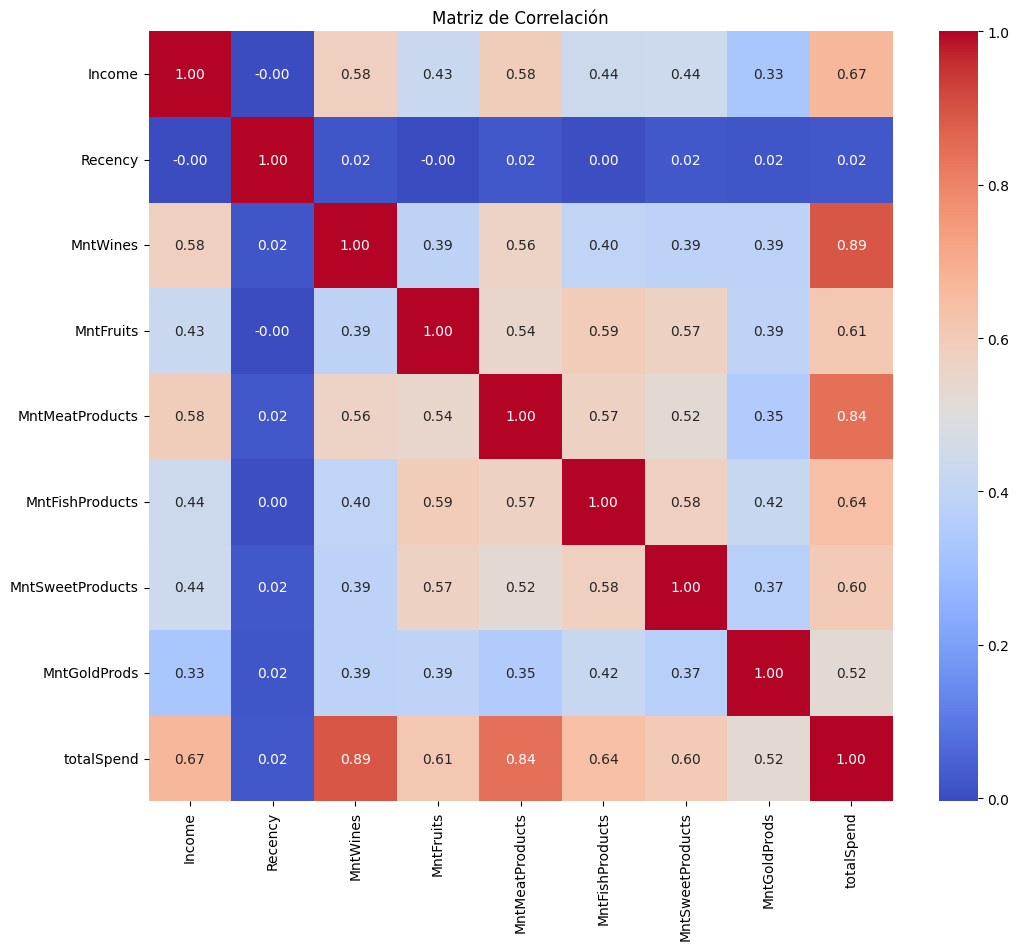

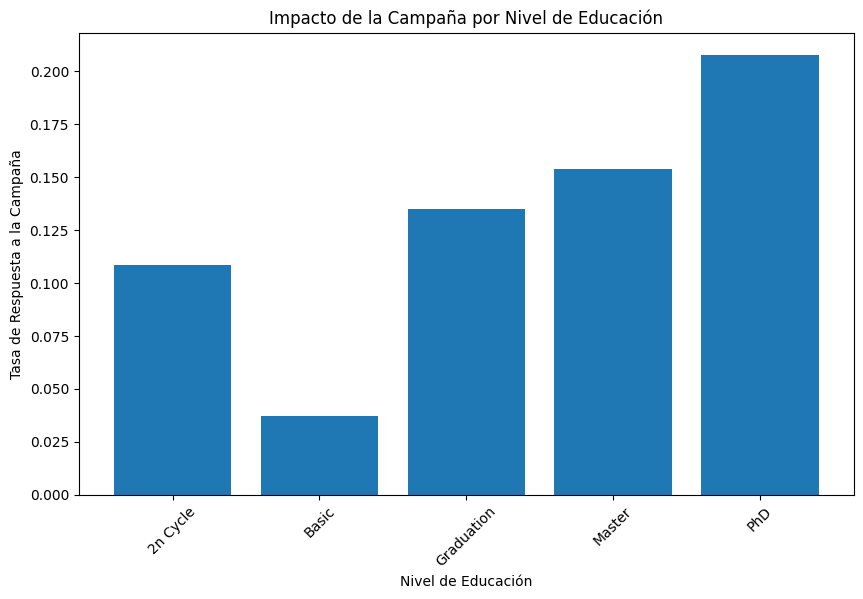

In [35]:
# prompt: forma de ver patrones para mejorar el marketing

import matplotlib.pyplot as plt
# Agrupar por nivel educativo y calcular la media del gasto total
gasto_por_educacion = df.groupby('Education')['totalSpend'].mean()

# Crear un gráfico de barras para visualizar
plt.figure(figsize=(10, 6))
plt.bar(gasto_por_educacion.index, gasto_por_educacion.values)
plt.xlabel('Nivel de Educación')
plt.ylabel('Gasto Promedio')
plt.title('Gasto Promedio por Nivel de Educación')
plt.xticks(rotation=45)
plt.show()

# Análisis de correlación entre variables
correlation_matrix = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'totalSpend']].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Análisis de las campañas de marketing
# Crear una tabla pivote para ver el impacto de la campaña por nivel educativo
pivot_table = df.pivot_table(values='Response', index='Education', aggfunc='mean')

# Visualizar la tabla pivote como un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table['Response'])
plt.xlabel('Nivel de Educación')
plt.ylabel('Tasa de Respuesta a la Campaña')
plt.title('Impacto de la Campaña por Nivel de Educación')
plt.xticks(rotation=45)
plt.show()
